# <center>Sentiment Analysis on Harvard University Reviews</center>


# Table of Contents

1. [Importing Data & Libraries](#1.-Importing-Data-&-Libraries)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Importing-Data)
    
    1.3 [Initial Exploration](#1.3-Initial-Exploration) <br><br>
    
2. [Exploratory Data Analysis](#2.Exploratory-Data-Analysis)

    2.1 [Missing Values](#2.1-Missing-Values)
    
    2.2 [Duplicates](#2.2-Duplicates)
    
    2.3 [Feature Engineering](#2.3-Feature-Engineering)

## 1. Importing Data & Libraries

### 1.1 Libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# external py file
import functions

# Warnings
import warnings
warnings.filterwarnings("ignore")

### 1.2 Data

In [2]:
data = pd.read_csv('/Users/antoniooliveira/Projects/Industrial Applications of AI/Assignment 4/harvard_reviews.csv')
data.head(3)

,published_date,published_platform,rating,type,helpful_votes,title,text
0,2023-12-28T08:02:14-05:00,Mobile,5,review,0,Best classes and good environment,Good thanks for everything good work group 👍 h...
1,2023-12-12T00:38:26-05:00,Desktop,4,review,0,Harvard University,Harvard University was founded in 1636 and is ...
2,2023-12-10T08:21:35-05:00,Mobile,3,review,0,Walk around campus,We did a walk around most of the Harvard Campu...


### 1.3 Initial Exploration

**Describe & Info**

In [3]:
data.describe()

,rating,helpful_votes
count,3184.000000,3184.000000
mean,4.456658,0.498744
std,0.744024,2.819638
min,1.000000,0.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,111.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   published_date      3184 non-null   object
 1   published_platform  3184 non-null   object
 2   rating              3184 non-null   int64 
 3   type                3184 non-null   object
 4   helpful_votes       3184 non-null   int64 
 5   title               3184 non-null   object
 6   text                3184 non-null   object
dtypes: int64(2), object(5)
memory usage: 174.2+ KB


**Unique Values**

In [5]:
data.nunique()

published_date        3184
published_platform       2
rating                   5
type                     1
helpful_votes           15
title                 2891
text                  3184
dtype: int64

In [6]:
list_ = ['published_platform', 'rating', 'type', 'helpful_votes']

for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")



Unique values in column 'published_platform': 
 ['Mobile' 'Desktop'] 


Unique values in column 'rating': 
 [5 4 3 1 2] 


Unique values in column 'type': 
 ['review'] 


Unique values in column 'helpful_votes': 
 [  0   2   1   3  91   4  19  48   5   7   8   6 111  14  10] 




Since the variable *type* is always the same, it will be dropped.

In [7]:
data = data.drop('type', axis = 1)

## 2 Exploratory Data Analysis

### 2.1 Missing Values

In [8]:
data.isnull().sum()

published_date        0
published_platform    0
rating                0
helpful_votes         0
title                 0
text                  0
dtype: int64

### 2.2 Duplicates

In [9]:
data[data.duplicated()]

,published_date,published_platform,rating,helpful_votes,title,text


### 2.3 Feature Engineering

**Published Date**

In [10]:
# Transforming published_date to datetime and setting all observations to the same timezone
data['published_date'] = pd.to_datetime(data['published_date'], utc=True)
data['published_date']

0      2023-12-28 13:02:14+00:00
1      2023-12-12 05:38:26+00:00
2      2023-12-10 13:21:35+00:00
3      2023-11-08 02:20:21+00:00
4      2023-10-02 21:40:42+00:00
                  ...           
3179   2010-10-29 09:47:57+00:00
3180   2010-08-23 10:08:51+00:00
3181   2010-08-23 04:06:41+00:00
3182   2010-06-03 11:37:36+00:00
3183   2009-09-27 20:39:18+00:00
Name: published_date, Length: 3184, dtype: datetime64[ns, UTC]

Extracting Information from the converted variable *published_date*

In [11]:
data['Hour'] = data['published_date'].dt.dayofweek 
data['Day'] = data['published_date'].dt.day
data['Month'] = data['published_date'].dt.month
data['Year'] = data['published_date'].dt.year
data['Timezone'] = data['published_date'].dt.tz

### 2.3 Outliers

In [14]:
# Defining a Colour Palette
palette = sns.color_palette("dark:salmon_r")

Visualising Outliers by using Boxplots

In [16]:
def plot_boxplots(data, columns_to_check, palette=None):
    for column in columns_to_check:
        plt.figure(figsize=(6, 4))  
        sns.boxplot(data=data[column], palette=palette)
        plt.title(f'Box Plot of {column}')
        plt.xticks()
        plt.show()


In [18]:
# Get a list of all numeric column names
columns_to_check = data.select_dtypes(include=['int', 'float']).columns.to_list()
        
functions.plot_boxplots(data, columns_to_check, palette=palette)

TypeError: 'module' object is not callable

Taking a closer look at the variables that show Outliers by using Statistical methods

In [ ]:
columns_to_check = ['rating', 'helpful_votes', 'Year', 'char_count']
outlier_info = functions.detect_outliers_per_column(data, columns_to_check)

# Print information for each column
for column, info in outlier_info.items():
    print(f"Column: {column}")
    print(f"Q1: {info['Q1']}")
    print(f"Q3: {info['Q3']}")
    print(f"Number of outliers: {info['outlier_count']}")
    print("--------------------")


In [ ]:
data[data['rating']]

# !!!!!!! look at rating < q1 or > q3 see if makes sense
do for the rest of variables

## 3. Text Preprocessing

Having noticed that there are non-English Reviews, the language in each review will now be detected through the usage of the langdetect library

**Language Detection**

In [12]:
data['language'] = data['text'].apply(functions.detect_language)

Listing the Unique Values of Language

In [13]:
list_ = ['language']
for value in list_:
    unique_values = data[value].unique()
    print(f"Unique values in column '{value}': \n {unique_values} \n\n")

Unique values in column 'language': 
 ['en' 'de' 'pt' 'es' 'ja' 'fr' 'it' 'pl' 'tr' 'el' 'ru' 'nl' 'sv' 'ko'
 'no' 'id' 'zh-cn' 'hu' 'ar' 'he' 'da' 'zh-tw' 'th' 'sk'] 




Displaying the Number of Observations per Language

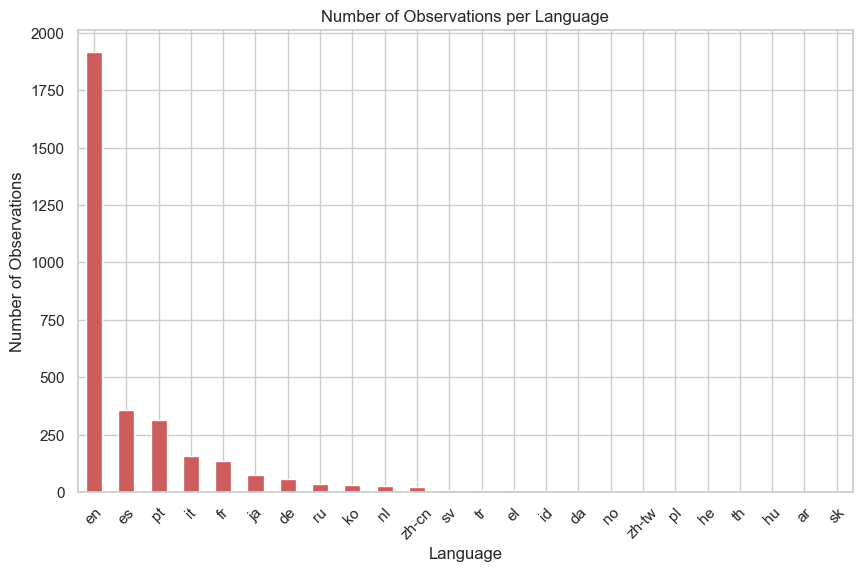

In [76]:
# Count observations by language
language_counts = data['language'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='indianred')
plt.title('Number of Observations per Language')
plt.xlabel('Language')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()

Even though most observations are in English (~60%), it is worth it to try to translate the remaining observations, since they still constitute a significant part of the dataset.

To do so, I explored several options, such as *libretranslatepy*, *translate* libraries and APIs of Google and DeepL.

Since the libraries were not working, possibily because of the amount of text in each observation, I decided to experiment with the DeepL API, as follows.

The DeepL API has a free tier which allows to translate 500k characters per month. As so, the number of characters existent in the dataset will be computed, to ensure they are within this limit.

In [16]:
# characters per observations
data['char_count'] = data['text'].str.len()

# total characters
data['char_count'].sum()

969564

Since the total character counts exceeds the limit, one must check the sum of characters from non-English observations (the ones that need translation).

In [17]:
data[data['language'] != 'en']['char_count'].sum()

361966

Since 361966 < 500000, this approach can be used. However, since this only allows 1 translation of the entire dataset per month, a smaller sample will be used to develop the rest of the notebook.

When most steps are finalised, the full dataset will then be translated.

In [32]:
data_sample = data.sample(10)
data_sample.head(3)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count
107,2019-09-02 04:13:56+00:00,Mobile,5,0,Harvard,A must see if in the area. The old buildings a...,0,2,9,2019,UTC,en,192
2308,2017-04-20 14:43:07+00:00,Desktop,5,0,Donde la excelencia se hace presente,Solamente de pasear por sus jardines y parques...,3,20,4,2017,UTC,es,108
2701,2015-09-15 14:15:10+00:00,Desktop,4,0,Interesante,Buena visita si vas a Boston... Si bien es una...,1,15,9,2015,UTC,es,217


Counting the number of characters in the sample

In [33]:
data_sample['char_count'] = data_sample['text'].str.len()

# total non-english characters
data_sample[data_sample['language'] != 'en']['char_count'].sum()

1294

**Translation**

In [35]:
auth_key = "14143fc8-d67d-487d-8605-a715b2691c9d:fx" 

# Translate 
data_sample['translated_text'] = data_sample.apply(lambda row: functions.translate_with_deepl(row['text'], auth_key, row['language'], 'EN'), axis=1)


In [37]:
data_sample.head(3)

,published_date,published_platform,rating,helpful_votes,title,text,Hour,Day,Month,Year,Timezone,language,char_count,translated_text
107,2019-09-02 04:13:56+00:00,Mobile,5,0,Harvard,A must see if in the area. The old buildings a...,0,2,9,2019,UTC,en,192,A must see if in the area. The old buildings a...
2308,2017-04-20 14:43:07+00:00,Desktop,5,0,Donde la excelencia se hace presente,Solamente de pasear por sus jardines y parques...,3,20,4,2017,UTC,es,108,Just walking through its gardens and parks you...
2701,2015-09-15 14:15:10+00:00,Desktop,4,0,Interesante,Buena visita si vas a Boston... Si bien es una...,1,15,9,2015,UTC,es,217,Good visit if you go to Boston... It's a pity ...


**Checking the correctness of the translation**

Since I am Portuguese I can understand Portuguese and Spanish, so some of these observations will be checked.

In [43]:
selected_columns = ['language', 'text', 'translated_text']
filtered_data = data_sample.loc[data_sample['language'].isin(['pt', 'es']), selected_columns]

print(filtered_data.to_string(index=False))

language                                                                                                                                                                                                                                                                                                                                                                                                             text                                                                                                                                                                                                                                                                                                                                                                                    translated_text
      es                                                                                                                                                                                                   

With all observations in the same language, we can move on to deal with Stopwords and Punctuation.

**Text Cleaning**

In [59]:
data_sample['clean_text'] = data_sample['translated_text'].apply(
    lambda x: functions.preprocessor(x,
                                        remove_punctuation=False,
                                        lowercase=False,
                                        remove_stopwords=True,
                                        lemmatization=False,
                                        stemming=False,
                                        tokenized_output=False,
                                        sentence_output=False))

data_sample['clean_text']

107     A must see area. The old buildings beautiful. ...
2308    Just walking gardens parks feel importance exc...
2701    Good visit go Boston... It's pity ca n't get m...
1222    We two days commencement day. There lot activi...
537     This excellent way take Harvard University. Jo...
543     We took walking tour entire Harvard Yard even ...
2414    Harvard University located close city Boston, ...
112     Excellent campus public grounds A pitty enter ...
29      When Boston, must go Harvard drive campus. The...
3171    Those travel Boston usually take detour Cambri...
Name: clean_text, dtype: object

## Export

Exporting clean data

In [ ]:
# data_sample.to_csv('clean_sample_data.csv', index=False)